<a href="https://colab.research.google.com/github/Vamsi995/Explainable-Grounded-Segment-Anything/blob/main/Explainable_Grounded_Segment_Anything.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation


In [ ]:
# Installing Gradio
!pip install --upgrade gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 119.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [ ]:
!pip uninstall -y supervision
!pip install -q supervision==0.6.0

In [ ]:
# Imports
import supervision as sv
import gradio as gr
import os
import torch
import sys
print(sv.__version__)

0.6.0


## Intalling Grounding DINO & Segment Anything Model

In [ ]:
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


### Grouding DINO Setup

In [ ]:
# Grounding DINO
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 463 (delta 175), reused 136 (delta 136), pack-reused 223 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 27.01 MiB/s, done.
Resolving deltas: 100% (241/241), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 6.4 MB/s eta 0:00:00


#### Model Weights

In [ ]:
GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [ ]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [ ]:
GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


#### Load Model


In [ ]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model
from groundingdino.util.inference import load_model, load_image, predict, annotate

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)
# grounding_dino_model = load_model(GROUNDING_DINO_CONFIG_PATH, GROUNDING_DINO_CHECKPOINT_PATH)


/content/GroundingDINO


/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/content/GroundingDINO/groundingdino/util/inference.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_checkpoint_path, map_location="cpu")


### Segment Anything Model Setup


In [ ]:
%cd {HOME}
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-xebsx7fx
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-xebsx7fx
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=53d681fdfae9ddcdabe37327acd485a712979f117cbe675e4891507d4b7ddead
  Stored in directory: /tmp/pip-ephem-wheel-cache-6h3vz_qu/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


#### Model Weights

In [ ]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
/content/weights


In [ ]:
SAM_CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(SAM_CHECKPOINT_PATH, "; exist:", os.path.isfile(SAM_CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


#### Load Model

In [ ]:
SAM_ENCODER_VERSION = "vit_h"

In [ ]:
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[SAM_ENCODER_VERSION](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


# Gradio Interface

In [ ]:
import numpy as np
from segment_anything import SamPredictor
import cv2


def segment(sam_predictor: SamPredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    sam_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, logits = sam_predictor.predict(
            box=box,
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    return np.array(result_masks)


def forward(input_img, text_prompt="shirt", box_threshold=0.35, text_threshold=0.25):
    # image = cv2.imread("/content/test.jpeg")
    image = input_img

    # Prompting Grounding DINO
    detections, labels = grounding_dino_model.predict_with_caption(
      image=image,
      caption=text_prompt,
      box_threshold=box_threshold,
      text_threshold=text_threshold
    )

    # convert detections to masks
    detections.mask = segment(
        sam_predictor=sam_predictor,
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
        xyxy=detections.xyxy
    )

    # annotate image with detections
    box_annotator = sv.BoxAnnotator()
    mask_annotator = sv.MaskAnnotator()
    annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
    annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)


    print(detections.mask)



    # return detections.mask
    return annotated_image, detections.mask


In [ ]:
demo = gr.Interface(forward, inputs=[gr.Image(), gr.Textbox(), gr.Slider(value=0.35, minimum=0, maximum=1, step=0.01), gr.Slider(value=0.25, minimum=0, maximum=1, step=0.01)], outputs= ["image"])

demo.launch(share=True)

In [ ]:
import cv2
image = cv2.imread("/content/test.jpg")
# image = input_img
text_prompt = "a person"
box_threshold = 0.35
text_threshold = 0.25
# Prompting Grounding DINO
detections, labels = grounding_dino_model.predict_with_caption(
  image=image,
  caption=text_prompt,
  box_threshold=box_threshold,
  text_threshold=text_threshold
)

# convert detections to masks
detections.mask = segment(
    sam_predictor=sam_predictor,
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    xyxy=detections.xyxy
)

# annotate image with detections
box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()
annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
# annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1126: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/content/GroundingDINO/groundingdino/models/GroundingDINO/transformer.py:862: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocas

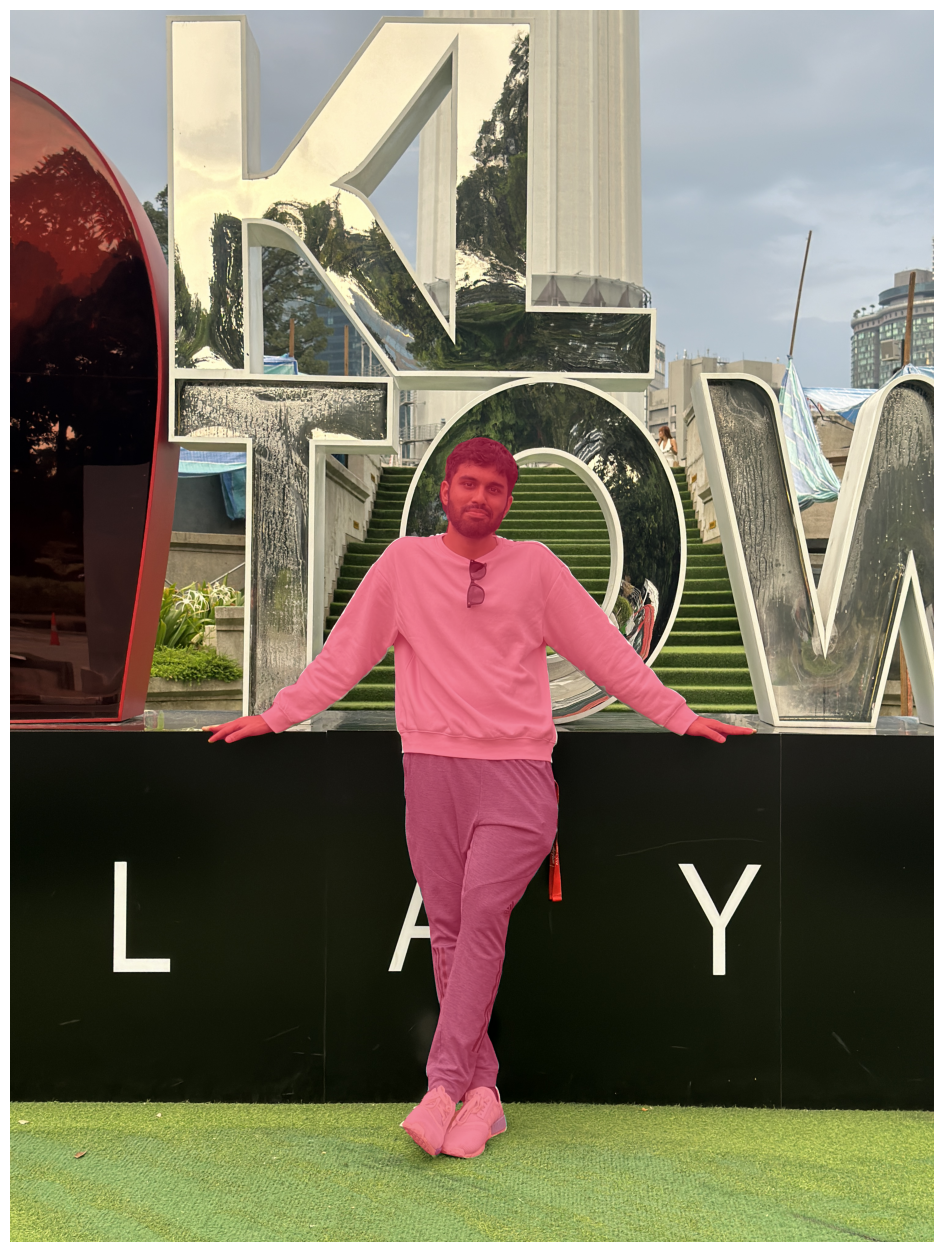

In [ ]:

%matplotlib inline
sv.plot_image(annotated_image, (16, 16))

In [ ]:
demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c1366ca248f0c255c9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:

# Load SAM model and predictor
sam_model = sam_model_registry['vit_h'](checkpoint='/content/GroundingDINO/weights/sam_vit_h_4b8939.pth')
sam_predictor = SamPredictor(sam_model)


KeyboardInterrupt: 

In [ ]:
import torch
from typing import Dict, List
from segment_anything.modeling.image_encoder import Attention
# Initialize a dictionary to store attention maps from each layer
attention_maps = {}

# Define a hook function to extract the attention maps
def attention_hook(module, input, output):
    # Store the attention weights from the module's output
    # output here will be the attention weights if the hook is placed in the right location
    attention_maps[id(module)] = output

# Function to register hooks to capture attention weights across SAM
def register_attention_hooks(model):
    for name, module in model.named_modules():
        # Check if the module is an Attention layer
        if isinstance(module, Attention):
            # Register the hook
            module.register_forward_hook(attention_hook)

# Assuming `sam_model` is your Segment Anything Model instance
# Register hooks to capture attention maps
register_attention_hooks(sam.image_encoder)

# Now, perform a forward pass through the model
# Replace `image_embedding`, `image_pe`, and `point_embedding` with your actual inputs
# output_queries, output_keys = sam_model.decoder(image_embedding, image_pe, point_embedding)

# After the forward pass, `attention_maps` will contain the attention maps



In [ ]:
for layer_id, attn_map in attention_maps.items():
    print(f"Layer ID: {layer_id}, Attention Map Shape: {attn_map.shape}")

Layer ID: 138706421533808, Attention Map Shape: torch.Size([25, 14, 14, 1280])
Layer ID: 138706421534960, Attention Map Shape: torch.Size([25, 14, 14, 1280])
Layer ID: 138706419951904, Attention Map Shape: torch.Size([25, 14, 14, 1280])
Layer ID: 138706419950464, Attention Map Shape: torch.Size([25, 14, 14, 1280])
Layer ID: 138706419942352, Attention Map Shape: torch.Size([25, 14, 14, 1280])
Layer ID: 138706419957664, Attention Map Shape: torch.Size([25, 14, 14, 1280])
Layer ID: 138706419956992, Attention Map Shape: torch.Size([25, 14, 14, 1280])
Layer ID: 138706419956224, Attention Map Shape: torch.Size([1, 64, 64, 1280])
Layer ID: 138706419953344, Attention Map Shape: torch.Size([25, 14, 14, 1280])
Layer ID: 138706419942208, Attention Map Shape: torch.Size([25, 14, 14, 1280])
Layer ID: 138706419941584, Attention Map Shape: torch.Size([25, 14, 14, 1280])
Layer ID: 138706419948784, Attention Map Shape: torch.Size([25, 14, 14, 1280])
Layer ID: 138706419948112, Attention Map Shape: torch

In [ ]:
from matplotlib import pyplot as plt
# Function to extract attention maps
# def get_attention_maps(image, query_points):
#     # Set image for SAM and perform forward pass
#     sam_predictor.set_image(image)

#     # Access SAM model's transformer layers
#     attention_maps = []

#     for layer in sam_model.mask_decoder.transformer.layers:
#         # Perform forward pass through each layer
#         # Extract attention weights (assuming attention_weights is available)
#         # The attention shape is typically (batch_size, num_heads, seq_length, seq_length)
#         attention = layer.self_attn.attention_weights  # Modify according to SAM's architecture
#         attention_maps.append(attention)

#     # Average across heads and get attention for each pixel
#     attention_maps = [att.mean(dim=1).detach().cpu().numpy() for att in attention_maps]

#     return attention_maps

# Test image and query points
image = cv2.imread("/content/test.jpg")  # Replace with an actual image
# query_points = [[120, 130], [210, 220]]  # Example query points

# Get attention maps
# attention_maps = get_attention_maps(image, query_points)

# Visualize attention maps
for idx, att_map in attention_maps.items():
    print(f"Attention Map Layer {idx} Shape: {att_map.shape}")
    # Reshape or interpolate to image dimensions if necessary
    attention_overlay = torch.mean(att_map[0], axis=0).reshape((16, 16))  # Example reshape if transformer patches are 16x16
    plt.imshow(attention_overlay.cpu().numpy(), cmap='viridis', interpolation='nearest')
    plt.title(f"Attention Map Layer {idx+1}")
    plt.colorbar()
    plt.show()

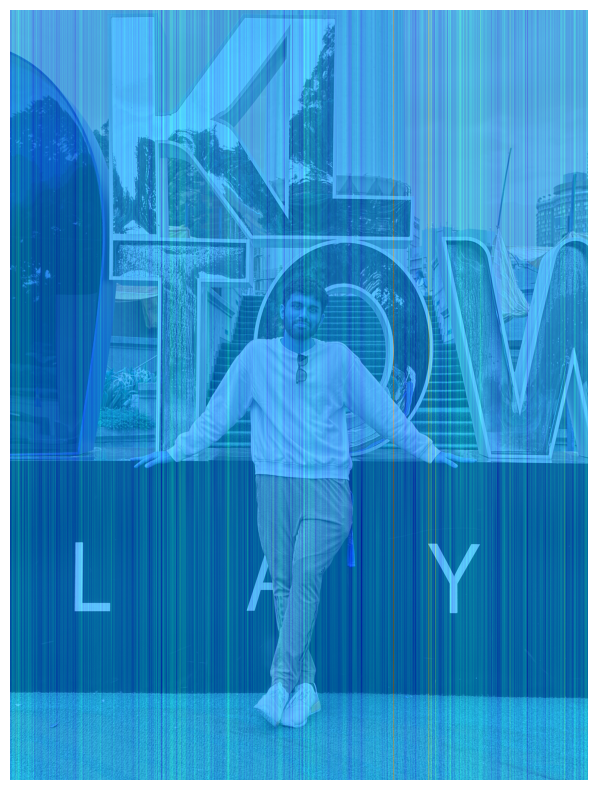

In [ ]:
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns

def visualize_attention_on_image(input_image, attention_map, alpha=0.6):
    """
    Visualizes the attention map overlayed on the input image.

    Args:
        input_image (np.array): The input image in numpy format (H x W x C).
        attention_map (torch.Tensor): The attention map to overlay on the image.
        alpha (float): The transparency level of the attention map overlay.
    """
    # Resize attention map to match the image size
    attention_map = cv2.resize(attention_map, (input_image.shape[1], input_image.shape[0]))

    # Normalize the attention map for better contrast
    attention_map = (attention_map - attention_map.min()) / (attention_map.max() - attention_map.min())

    # Convert attention map to heatmap
    heatmap = cv2.applyColorMap((attention_map * 255).astype(np.uint8), cv2.COLORMAP_JET)

    # Overlay the heatmap on the original image
    overlayed_image = cv2.addWeighted(input_image, 1 - alpha, heatmap, alpha, 0)

    # Display the overlayed image
    plt.figure(figsize=(10, 10))
    plt.imshow(overlayed_image)
    plt.axis("off")
    plt.show()

# Assuming `input_image` is your input image as a numpy array, `B x H x W x C`
# Assuming `attention_maps` contains your extracted attention maps
avg_attention_map = None
# Process and visualize attention maps for each layer
for layer_id, attn_map in list(attention_maps.items())[:4]:
    # Aggregate attention heads by averaging them
    # attn_map shape is [B, N_heads, N_tokens, N_tokens], selecting the first batch for simplicity
    if avg_attention_map is None:
        avg_attention_map = attn_map[0].mean(dim=0).cpu().detach().numpy()
    else:
        avg_attention_map += attn_map[0].mean(dim=0).cpu().detach().numpy()

    # The attention map might be smaller than the input image
    # Apply the map to visualize attention in the input image space
visualize_attention_on_image(image, avg_attention_map)

In [ ]:
# Define a dictionary to store feature maps
feature_maps = {}

# Hook function to capture feature maps
def hook_fn(module, input, output):
    feature_maps[module] = output

# Register hooks on specific layers (e.g., last layer of ViT blocks)
for name, layer in sam.image_encoder.blocks.named_children():
    if int(name) == len(sam.image_encoder.blocks) - 1:  # Example: last block
        layer.register_forward_hook(hook_fn)

In [ ]:
# # Load and preprocess input image for SAM
# input_image = ...  # Replace with the image loading code
# predictor = SamPredictor(sam)
# predictor.set_image(input_image)

# Run inference to capture feature maps
# _ = predictor.predict(point_coords=None, point_labels=None)

# Get the feature map from the selected layer
# Assuming we have a feature map from the last encoder block

feature_map = sum(list(feature_maps.values()))
# [0][0]  # Get first batch example

# Resize the feature map to match the input image size
input_image = image
h, w, _ = input_image.shape
feature_map_resized = torch.nn.functional.interpolate(
    feature_map.unsqueeze(0), size=(h, w), mode="bilinear", align_corners=False
)[0].cpu().detach().numpy()

# Normalize feature map and apply a colormap
feature_map_resized = np.mean(feature_map_resized, axis=0)  # Average over channels if needed
feature_map_normalized = cv2.normalize(feature_map_resized, None, 0, 255, cv2.NORM_MINMAX)
heatmap = cv2.applyColorMap(feature_map_normalized.astype(np.uint8), cv2.COLORMAP_JET)

# Overlay heatmap on the original image with some transparency
overlay = cv2.addWeighted(input_image, 0.6, heatmap, 0.4, 0)

# Plot original image and overlayed heatmap
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(input_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Feature Map Overlay")
plt.imshow(overlay)
plt.axis("off")

plt.show()

ValueError: Input and output must have the same number of spatial dimensions, but got input with spatial dimensions of [64, 64, 1280] and output size of (4032, 3024). Please provide input tensor in (N, C, d1, d2, ...,dK) format and output size in (o1, o2, ...,oK) format.

In [ ]:
!pip install lime

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.color import label2rgb

# Function to get the segmentation mask
def sam_segmentation_wrapper(image):
    sam_predictor.set_image(image)
    input_points = np.array([[100, 150]])  # Replace with dynamically chosen points
    masks, _, _ = sam_predictor.predict(point_coords=input_points)
    return masks[0]  # Return the first mask as binary output

# Wrapper function for LIME
def predict_fn(images):
    return np.array([sam_segmentation_wrapper(image) for image in images])

# Use LIME's ImageExplainer
explainer = lime_image.LimeImageExplainer()

# Image to be explained (use a test image)
image = cv2.imread("/content/test.jpg")  # Load an image as a numpy array

# Generate explanation
explanation = explainer.explain_instance(
    image,
    forward,
    top_labels=1,  # Number of labels to explain
    hide_color=0,
    num_samples=50  # Number of perturbed samples to generate
)

# Display the explanation
temp, mask = explanation.get_image_and_mask(
    label=0,  # Label index (mask output)
    positive_only=True,
    hide_rest=False,
    num_features=5,
    min_weight=0.1
)
plt.imshow(label2rgb(mask, image, bg_label=0))
plt.title("Explanation for SAM Segmentation")
plt.axis('off')
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1126: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


RuntimeError: selected index k out of range

# Interface Design

In [ ]:
# Installing Gradio
!pip install --upgrade gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: gradio
    Found existing installation: gradio 5.4.0
    Uninstalling gradio-5.4.0:
      Successfully uninstalled gradio-5.4.0


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 550, in main
    )
  File "/usr/local/lib/python3.10/dist-packages/starlette/templating.py", line 208, in TemplateResponse
    template = self.get_template(name)
  File "/usr/local/lib/python3.10/dist-packages/starlette/templating.py", line 131, in get_template
    return self.env.get_template(name)
  File "/usr/local/lib/python3.10/dist-packages/jinja2/environment.py", line 1013, in get_template
    return self._load_template(name, globals)
  File "/usr/local/lib/python3.10/dist-packages/jinja2/environment.py", line 972, in _load_template
    template = self.loader.load(self, name, self.make_globals(globals))
  File "/usr/local/lib/python3.10/dist-packages/jinja2/loaders.py", line 126, in load
    source, filename, uptodate = self.get_source(environment, name)
  File "/usr/local/lib/python3.10/dist-packages/jinja2/loaders.py", line 207, in 

In [ ]:
css = """
h1 {
    text-align: center;
    display:block;
}
"""

js_func = """
function refresh() {
    const url = new URL(window.location);

    if (url.searchParams.get('__theme') !== 'light') {
        url.searchParams.set('__theme', 'light');
        window.location.href = url.href;
    }
}
"""

SERVER_PORT = 7860
my_theme = gr.Theme.from_hub("shivi/calm_seafoam")

with gr.Blocks(title="Explainable Visual AI Interface", js=js_func, css=css, theme=my_theme).queue() as demo:

        gr.Markdown("""# Explainable Visual AI Interface with Segment Anything Model & Grounding DINO
        """)

        with gr.Row():
            # UI for Classification task
            with gr.Tab(label="Semantic Segmentation"):

                with gr.Row():

                    # Image Section
                    with gr.Column():

                        # Image Input
                        with gr.Row():
                            seg_img = gr.Image(label="Input image", show_label=False)

                        with gr.Row():
                            seg_tsk = gr.Textbox(label="Prompt", visible=True)

                        # Text Input
                        # More Controls
                        with gr.Row():
                            seg_slide_box = gr.Slider(value=0.35, minimum=0, maximum=1, step=0.01, label="Segmentation Strength")
                            seg_slide_text = gr.Slider(value=0.25, minimum=0, maximum=1, step=0.01, label="Textual Strength")

                        # Run Segmentation
                        with gr.Row():
                            seg_pred_btn = gr.Button("Run Segmentation")

                    # Segmentation Section
                    with gr.Column():
                        # clf_preds = gr.Label(label="Top-3 Predictions", show_label=False)

                        # Segmented Image
                        with gr.Row():
                            seg_out = gr.Image(label="Segmented Output")

                        # Gallery
                        with gr.Row():
                            seg_gallery = gr.outputs.Gallery(label="Segmentations")

                        # Run Explainable AI
                        with gr.Row():
                            seg_xai = gr.Button("Run Explainable AI")

                    # Explanations
                    with gr.Column():
                        clf_xai_img = gr.Image(type="pil", label="Explanation Image", show_label=False)
                        seg_textual_button = gr.Button("Textual Explanation", variant="primary")
                    with gr.Column():
                        seg_textual = gr.Text(label="Textual Explanation", show_label=False)

        # Run prediction for segmentation
        seg_pred_btn.click(fn=forward,
                           inputs=[seg_img, seg_tsk, seg_slide_box, seg_slide_text],
                           outputs=[seg_out, seg_gallery])

        seg_xai.click(fn=forward,
                           inputs=[seg_img, seg_tsk, seg_slide_box, seg_slide_text],
                           outputs=[seg_out, seg_gallery])

        seg_textual_button.click(fn=forward, inputs=[seg_img, seg_tsk, seg_slide_box, seg_slide_text], outputs=[seg_textual])

        demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://884acfac83e240ab65.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import cv2
img = cv2.imread('./data/Elephant/data/05fig34.jpg')
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('./map.jpg', superimposed_img)